# 实验课 11

完整的数据科学过程包括：

* 定义研究目标
* 收集数据（实验8、实验9-1）
* 数据预处理（实验10-1）
* 数据概览（实验10-1）
* 数据建模与评价
* 数据可视化（实验7-3）

接下来的实验我们主要从**数据建模与评价**角度入手，从统计模型、机器学习模型、数据挖掘模型这三个类别中为大家简介并演示一些经典的数据建模技术。无论采取哪种技术，大多数模型构建包括以下步骤：

* 选择模型技术和变量
* 执行模型
* 模型评价与进一步修正

## 实验11-1 Scikit-Learn库简介

Scikit-Learn是最流行的机器学习算法库，它为各种常用机器学习算法提供了高效版本，无需我们实现复杂的算法。

Scikit-Learn中的所有机器学习算法都是通过API实现的，它为各种机器学习应用提供了统一的接口，常用使用步骤如下：

* 导入适当的模型类和评估器类；
* 配置模型的超参数，实例化模型类；
* 整理数据并输入
* 调用模型实例的`fit()`方法对数据进行拟合；
* 对新数据应用模型：
> 监督学习模型：使用`predict()`方法预测新数据的标签；
>
> 无监督学习模型：使用`transform()`和`predict()`方法转换或推断数据的性质。

Scikit-Learn非Python自带库，需要我们手动安装。请启动Anaconda Powershell Prompt，并切换到你的环境（若有），输入`conda list`，查看是否已安装`scikit-learn`，若没有，请在命令行输入`conda install scikit-learn`并按回车，开始自动下载并安装。

## 实验11-2 线性回归

我们在高中数学课上学习了一元线性回归模型，对一些散点拟合出一条近似的一次函数曲线 y=wx+b.

现在我们使用计算机来构造线性回归模型，并拟合出一条直线。

假设我们的数据点大致分布在 y=2x+1 这条直线的两侧，首先我们先生成一些数据点，并且生成散点图（为了程序每次运行时生成的随机数相同，我们设定一下随机数种子）：

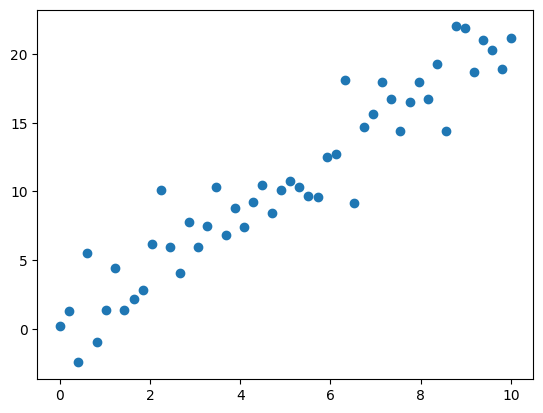

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)
x = np.linspace(0,10)
err = np.random.randn(50) * 2  # 人为将误差范围适当扩大一点
y = 2 * x + 1 + err

plt.scatter(x,y)
plt.show()

接下来我们导入模型类和评估器类：

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'sklearn'

配置模型的超参数并且实例化：一个模型类有很多的超参数，我们可以通过[查阅API文档](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)了解各个超参数的含义，这里我们采取默认值。

In [ ]:
model = LinearRegression()

数据我们在之前已经准备完毕，变量x是一个一维数组，但是现实生活中符合的更多是多项式函数，x是一个二维矩阵，并且scikit-learn接受的是二维数组（其中行为样本，列为特征）。

我们需要将变量x转换为二维数组，x中的每个值作为样本。

In [ ]:
in_x = x.reshape((len(x),1))

In [ ]:
model.fit(in_x,y)

`fit()`方法经过大量运算拟合出一条函数曲线，函数各项的系数（一次函数中就是斜率）和截距分别存储在`coef_`和`intercept_`参数中。

In [ ]:
print(model.coef_)
print(model.intercept_)

这里拟合出的一次函数即为 y=2.12x+0.11 ，噪点会对拟合过程产生一定影响。

我们把散点和拟合出的函数图像绘制在一起：

In [ ]:
pre_y = model.coef_ * x + model.intercept_
plt.scatter(x,y)
plt.plot(x,pre_y,color='r',label='y=%.2fx+%.2f'%(model.coef_,model.intercept_))
plt.legend()
plt.show()

最后我们利用评估器类输出拟合出的函数曲线与标准函数曲线的误差，这里我们采用均方误差（MSE）作为指标：

均方误差的计算公式为：

$$
MSE=\frac{1}{n}\sum_{i=1}^n(\hat{y_i}-y_i)^2
$$

In [ ]:
mse = mean_squared_error(y,pre_y)
print(mse)

以上是简单的拟合一元线性函数，通过`LinearRegression`类还可以拟合多元线性函数：

$$
y=x_0+w_1x_1+w_2x_2+...+w_nx_n
$$

也就是拟合出三维空间中的一个平面或者是更高维空间中的一个超平面。

## 实验11-3 多项式回归

假如我们有如图所示的数据点：

![Poly](img/Lab11-3-1.png)

如果使用线性回归显然是不合适的，这时候需要利用复杂的函数去拟合这些数据点。不过非线性函数实在是太多了，例如三角函数、对数函数、指数函数……，我们事先并不知道这些数据点更切合哪种函数。

在高等数学中我们学过利用**泰勒公式**通过多项式函数去近似表达一些初等函数，例如：

![ex](img/Lab11-3-2.png)

理论上我们可以用多项式函数去近似绝大多数初等函数，这样我们拟合非线性数据点就有了解决方案。

现在我们生成一些位于函数曲线

$$
y=0.1x^3+0.35x^2+0.1x+1
$$

附近的数据点。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.linspace(-5,3)
err = np.random.randn(50) * 0.5  # 噪音点幅度手动调低
y = 0.1 * x ** 3 + 0.35 * x ** 2 + 0.1 * x + 1 + err

plt.scatter(x,y)
plt.show()

Scikit-Learn没有直接提供多项式回归模型，不过我们可以通过“基函数”对原始数据进行变换，间接地利用线性回归模型构造非线性回归模型。

我们先预测该数据由二次函数产生的：

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

in_x = x.reshape(len(x),1)

model_1 = Pipeline([('Poly',PolynomialFeatures(degree=2)),('Linear',LinearRegression())])
model_1.fit(in_x,y)

print(model_1.named_steps['Linear'].coef_)
print(model_1.named_steps['Linear'].intercept_)

模型拟合的二次函数为

$$
y=1.85+0.72x+0.05x^2
$$

我们再画出拟合的函数图像：

In [ ]:
b = model_1.named_steps['Linear'].intercept_
w1 = model_1.named_steps['Linear'].coef_[1]
w2 = model_1.named_steps['Linear'].coef_[2]
y_pre = b + w1 * x + w2 * x **2
plt.scatter(x,y)
plt.plot(x,y_pre,color='r')
plt.show()

看起来二次函数似乎不太拟合数据点的分布，我们可以从均方误差看出来：

In [ ]:
mse = mean_squared_error(y,y_pre)
print(mse)

我们再尝试用三次函数拟合一下：

In [ ]:
model_2 = Pipeline([('Poly',PolynomialFeatures(degree=3)),('Linear',LinearRegression())])
model_2.fit(in_x,y)

print(model_2.named_steps['Linear'].coef_)
print(model_2.named_steps['Linear'].intercept_)

模型拟合的三次函数为

![tri_math](img/Lab11-3-3.png)

看起来与理想的

![math](img/Lab11-3-4.png)

有点接近，我们画出拟合的三次函数图像并且输出均方误差：

In [ ]:
b = model_2.named_steps['Linear'].intercept_
w1 = model_2.named_steps['Linear'].coef_[1]
w2 = model_2.named_steps['Linear'].coef_[2]
w3 = model_2.named_steps['Linear'].coef_[3]
y_pre = b + w1 * x + w2 * x ** 2 + w3 * x ** 3

plt.scatter(x,y)
plt.plot(x,y_pre,color='r')
plt.show()

In [ ]:
mse = mean_squared_error(y,y_pre)
print(mse)

可以看出三次函数可以较好地拟合原始数据点，并且MSE相对于二次函数有了大幅度的下降。

那是否代表高次函数可以更好地拟合任何数据点呢？我们尝试一下利用**二十次函数**（看起来真夸张）去拟合数据：

In [ ]:
model_3 = Pipeline([('Poly',PolynomialFeatures(degree=20)),('Linear',LinearRegression())])
model_3.fit(in_x,y)

b = model_3.named_steps['Linear'].intercept_
w = [x for x in model_3.named_steps['Linear'].coef_[1:]]
w.insert(0,None)  # 在w列表开头插入一个占位符，便于系数与下标对应

y_pre = b
for i in range(1,21):
    y_pre += w[i] * x ** i

plt.scatter(x,y)
plt.plot(x,y_pre,color='r')
plt.show()

print(mean_squared_error(y,y_pre))

看起来拟合出的函数曲线更加契合数据点，并且MSE更加小了。

但是不要忘记原始数据点是**包含噪声**的，过度拟合原始数据并不是完美的情况（假如极端情况大部分数据点的y值介于1-2之间，有一个异常点的y值达到了100，我们没有必要也不能为了拟合这个异常点而突然“拔高”函数曲线），理想的状态就是近似地拟合数据（泛化性）。后面的实验我们会继续探讨**过拟合**和**欠拟合**的问题。

## 实验11-4 处理真实数据之前……

刚才介绍的回归示例为大家简单展示了如何利用Scikit-Learn库快速构造模型并使用。但是刚才的数据点都是我们用计算机生成的，并且我们了解这些数据点是如何生成的（虽然我们“自以为是”地添加了一些噪声）。

实际生活中数据是如何产生的、这些数据符合什么分布等等这些问题我们并不了解；此外对于训练出的模型我们还要通过一些**测试数据**对其进行评估，对于唯一的数据集如何既要训练又要测试又是一个问题。

### 1. 训练集与测试集

虽说我们处于“大数据”时代，数据唾手可得，但是数据也是很珍贵的资源，对于数据工程来说快速生成一个比较准确的模型是主要任务，有的时候可能由于客观条件限制无法继续获得数据，这时候对于我们手中已有的数据，需要进行合理的划分：一部分用于训练模型（训练集）；另一部分用于测试模型（测试集）。

例如我们读取鸢尾花数据集（Scikit-Learn库中也自带该数据集），目标是根据花的四个特征确定是哪一种鸢尾花。那么每条数据包含四个浮点数和一个文字标签，我们把全部数据分为训练集和测试集，先使用训练集训练出模型，再将测试集的每一条数据输入模型，对比模型输出与理想输出是否一致。

小规模数据集（万数量级以下）训练集与测试集的划分比例一般为7:3或8:2；大规模数据集训练集与测试集的划分比例一般为98:2或99:1。

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
x = iris_data['data']
y = iris_data['target']
print('全体数据量：',len(x))

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)  # shuffle参数用于“洗牌”，打乱原始的数据行排列顺序
print('训练集数据量：',len(x_train))
print('测试集数据量：',len(x_test))

### 2. 归一化/标准化

归一化/标准化实质是一种线性变换，线性变换有很多良好的性质，这些性质决定了对数据改变后不会造成“失效”，反而能提高数据的表现。在使用梯度下降的方法求解最优化问题时，归一化/标准化后可以加快梯度下降的求解速度，即提升模型的收敛速度。如左图所示，未归一化/标准化时形成的等高线偏椭圆，迭代时很有可能走“之”字型路线（垂直长轴），从而导致迭代很多次才能收敛。而如右图对两个特征进行了归一化，对应的等高线就会变圆，在梯度下降进行求解时能较快的收敛。
![GD](img/Lab11-4-1.png)

例如我们对刚才的训练集数据的四个特征进行归一化：

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

temp_x = pd.DataFrame(x_train)
print(temp_x.describe())

In [ ]:
min_max_scaler = MinMaxScaler()
processed_x = min_max_scaler.fit_transform(x_train)
temp_x = pd.DataFrame(processed_x)
print(temp_x.describe())

我们看到处理后的数据均介于0-1之间。如果原始数据特征的方差不大，可以使用归一化；如果数据存在异常值和较多噪音，则需要用标准化处理数据。

标准化将数据按属性（也就是列）减去其均值，并除以其方差。得到的结果是，对于每个属性来说所有数据都聚集在0附近，方差为1。

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
processed_x = scale.fit_transform(x_train)

temp_x = pd.DataFrame(processed_x)
print(temp_x.describe())

## 实验练习11

在实验练习08中我们使用的数据为两个城市在不同因素影响下某小时共享单车租用的数量。现在我们利用该数据集构建一个回归预测模型，根据数据中的某些属性预测该时段内的单车租用数量，该表所有值均为整型数据，表结构为：

* id 记录编号，无其他意义
* city 城市代号，0为北京，1为上海
* hour 小时，代表时间
* is_workday 是否为工作日，0为否，1为是
* temp_air 大气温度，单位为摄氏度
* temp_body 体感温度，单位为摄氏度
* weather 天气代号，1为晴天，2为多云或阴天，3为雨天或雪天
* wind 风级，数值越大代表风速越大
* y 该小时内共享单车被租用的数量

请完成以下任务：

1. 数据获取：数据集已下载至`bike.csv`文件中，请使用pandas库读取该文件。

> 提示：原始数据集共10,000条数据。

2. 数据预处理 I：`id`属性对构建回归预测模型没有帮助，请剔除掉该列。

3. 数据预处理 II：我们暂不考虑不同城市对单车租用的影响，请筛选出上海市的所有数据，然后剔除`city`列。

> 提示：目前剩余4,998条数据。

4. 数据预处理 III：为简化数据，请将`hour`列中原来6点-18点统一为1；19点-次日5点统一为0。

5. 数据预处理 IV：`y`列为单车租用数量，是我们的预测目标（标签），请将该列提取出来，并转换为一个numpy**列向量**，将原先的`y`列剔除。

6. 数据预处理 V：请将DataFrame对象转换为Numpy数组，方便后续操作。

7. 数据集划分：请按照训练集与测试集8:2的比例将原始数据集划分。

8. 数据预处理 VI：请分别对训练集数据、训练集标签、测试集数据和测试集标签进行归一化。

9. 模型构建：请先构建一个**线性回归模型（多元一次函数）**，然后利用训练集训练模型。

10. 模型测试：利用测试集对训练好的模型进行评估。

> 提示：使用`predict(data_array)`方法输入测试集，该函数返回值为模型预测值。

11. 模型评估：请使用均方根误差（RMSE）作为评估指标，并输出RMSE值。

均方根误差(Root of Mean Squared Error)，公式为
$$
RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y_i}-y_i)^2}
$$
可以直接通过对MSE求平方根获得。